# Decision Trees and Random Forests - more advanced

In [36]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Prepare data

### DATASET

* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [37]:
#Read dataset
df = pd.read_csv('./Dataset/loan_data.csv')

In [38]:
#Info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [40]:
#General dataset statistics
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [41]:
#First 5 rows
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


Text(0.5, 0, 'FICO')

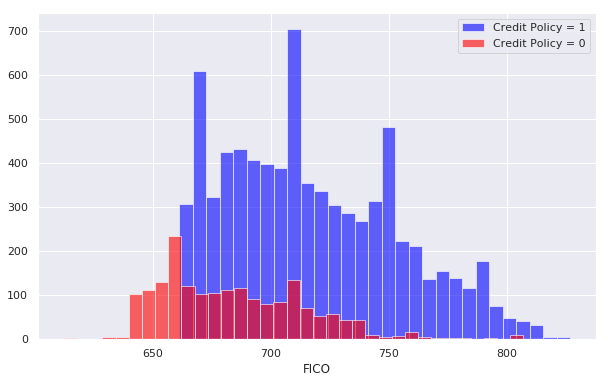

In [42]:
#Create figure
plt.figure(figsize = (10,6))
#Histogram for 'credit.policy' column == 1
df[df['credit.policy']==1]['fico'].hist(bins=35, color='blue', 
                                        label='Credit Policy = 1', 
                                        alpha = 0.6)
#Histogram for 'credit.policy' column == 0
df[df['credit.policy']==0]['fico'].hist(bins=35, color='red', 
                                        label='Credit Policy = 0', 
                                        alpha = 0.6)
#Show legend
plt.legend()
#Name x axis as 'FICO'
plt.xlabel("FICO")

Text(0.5, 0, 'FICO')

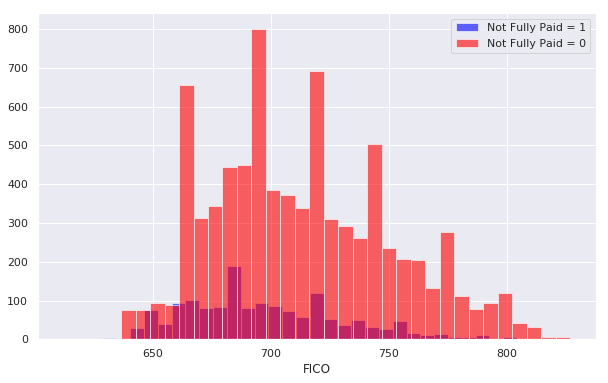

In [44]:
#Create figure
plt.figure(figsize = (10,6))
#Histogram for 'not.fully.paid' column == 1
df[df['not.fully.paid']==1]['fico'].hist(bins=35, color='blue', 
                                        label='Not Fully Paid = 1', 
                                        alpha = 0.6)
#Histogram for 'not.fully.paid' column == o
df[df['not.fully.paid']==0]['fico'].hist(bins=35, color='red', 
                                        label='Not Fully Paid = 0', 
                                        alpha = 0.6)
#Show legend
plt.legend()
#Name x axis as 'FICO'
plt.xlabel("FICO")

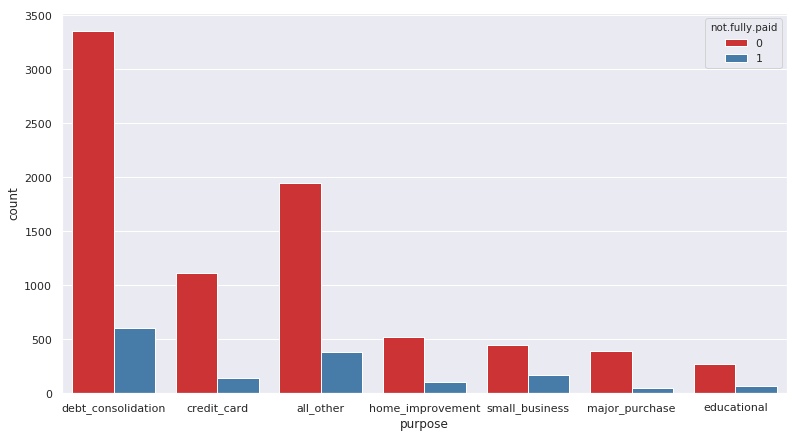

In [46]:
#Create figure
plt.figure(figsize = (13,7))
#Count plot for 'purpose' column split by 'not.fully.paid' column
sns.countplot(data=df, x='purpose', hue='not.fully.paid', palette='Set1')

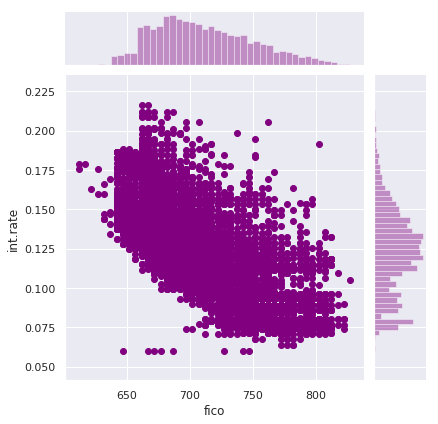

In [47]:
#Joint plot for 'fico' and 'int.rate' columns
sns.jointplot(data=df, x='fico', y='int.rate', color='purple')

<Figure size 792x504 with 0 Axes>

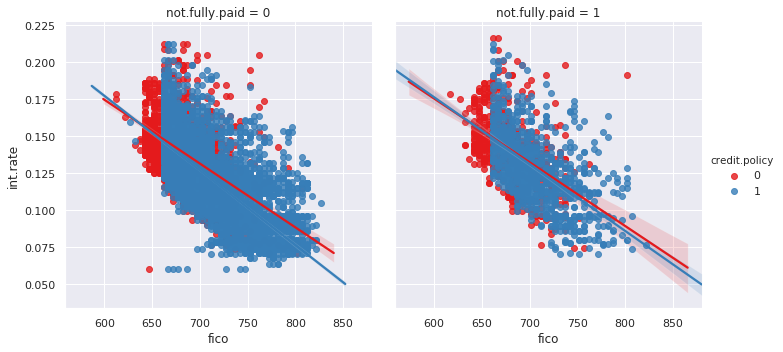

In [48]:
#Create figure
plt.figure(figsize = (11,7))
#Regression plot for 'fico' and 'int.rate', split colors by 'credit.policy' 
#and split columns by 'not.fully.paid'
sns.lmplot(data=df, x='fico', y='int.rate', hue='credit.policy', 
           col='not.fully.paid', palette='Set1')

In [49]:
#Grab categorical column
cat_feats = ['purpose']

In [50]:
#Create one-hot encode columns instead on numerical values in purpose columns
final_data = pd.get_dummies(df, columns=cat_feats, drop_first=True)

In [51]:
#Show final data
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [52]:
#Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(final_data.drop('not.fully.paid', axis=1), final_data['not.fully.paid'],
                                                   test_size=0.3, random_state=101)

## DECISION TREE

In [53]:
#Create Decision Tree
dtree = DecisionTreeClassifier()

In [54]:
#Train classifier
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [55]:
#Predict test labels
preds = dtree.predict(X_test)

In [56]:
#Show metrics for test dataset
print(classification_report(y_test, preds))
print('\n')
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.23      0.20       443

   micro avg       0.73      0.73      0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874



[[1996  435]
 [ 343  100]]


## RANDOM FOREST

In [69]:
#Create 300 Trees in Random Forest
rtree = RandomForestClassifier(n_estimators=300)

In [70]:
#Train classifier
rtree.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [71]:
#Predict test labels
pred_tree = rtree.predict(X_test)

In [72]:
#Show metrics for test dataset
print(classification_report(y_test, pred_tree))
print('\n')
print(confusion_matrix(y_test, pred_tree))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.50      0.02      0.03       443

   micro avg       0.85      0.85      0.85      2874
   macro avg       0.67      0.51      0.48      2874
weighted avg       0.79      0.85      0.78      2874



[[2423    8]
 [ 435    8]]


### In this case the Random forest algorithm better classify Positive labels than the Decision tree algorithm. But it does not work well when it comes to Neagtive labels.

### To improve efficiency, it is necessary to experiment with algorithm parameters.